## Setup

In [35]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_boston
import statsmodels.formula.api as smf # for linear modeling
import matplotlib.pyplot as plt


feature_test = pd.read_csv('data/dengue_features_test.csv')
feature_train = pd.read_csv('data/dengue_features_train.csv')
labels_train = pd.read_csv('data/dengue_labels_train.csv')

**feature_train**: is the climate data for a week of a given year

**labels_train**: number of dengue cases for a week and year

**feature_test**: Use to test our model


In [36]:
# merge the data sets into one fat table
new_df = pd.merge(feature_train, labels_train,  how='left', left_on=['city','year', 'weekofyear'], right_on = ['city','year', 'weekofyear'])

In [38]:
# add new variable
new_df['new_avg_temp_c'] = ( new_df.station_avg_temp_c + (new_df.reanalysis_avg_temp_k - 273.15 ) )/ 2
x = new_df

## Correlations

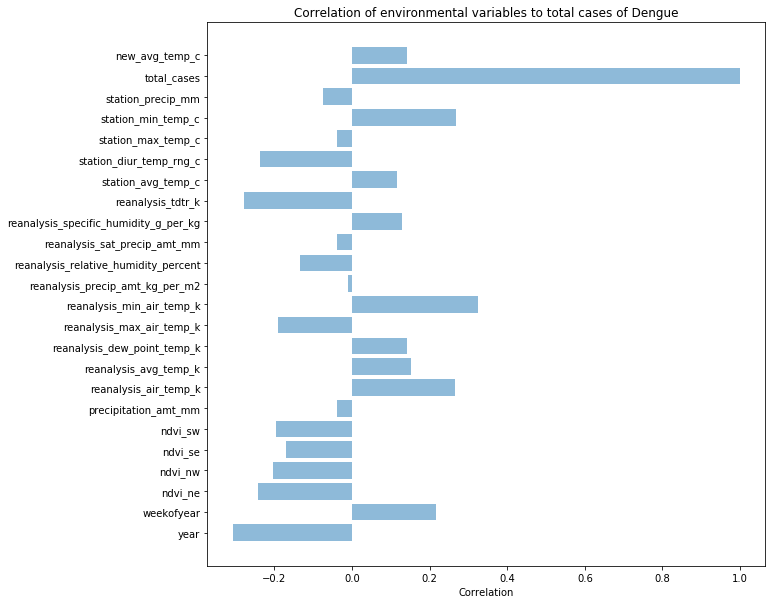

In [39]:
from matplotlib.pyplot import figure

correlation = new_df.corr()
corr_sorted = correlation.sort_values(by=['total_cases'])

features = list(correlation.columns.values)
corr_nums = list(correlation.total_cases)

figure(figsize=(10,10))
plt.barh(features, corr_nums, align='center', alpha=0.5)
plt.yticks(features, features)
plt.xlabel('Correlation')
plt.title('Correlation of environmental variables to total cases of Dengue')

plt.show()

In [48]:
corr_nums

[-0.3068055268942123,
 0.21645191306892947,
 -0.24137617216494556,
 -0.20223537415327042,
 -0.16861158256131123,
 -0.19646075838008673,
 -0.03873965486114981,
 0.2649515277638914,
 0.1516370964634295,
 0.14253051939880498,
 -0.19134519536217512,
 0.32525150009101694,
 -0.010031036770202475,
 -0.13245247479971567,
 -0.03873965486114981,
 0.1298606295130499,
 -0.2784828443020317,
 0.11610851285583475,
 -0.23784368898884625,
 -0.0392194669753125,
 0.2671093399927146,
 -0.07437445365334727,
 1.0,
 0.14172981569884552]

In [51]:
# Explore correlations
corr_table = pd.DataFrame({"variable":features, "correlation": corr_nums })

# absolute value of the correlation table
abs_corr_table = corr_table
abs_corr_table.correlation = abs_corr_table.correlation.abs()



In [53]:
corr_table

,variable,correlation
0,year,0.306806
1,weekofyear,0.216452
2,ndvi_ne,0.241376
3,ndvi_nw,0.202235
4,ndvi_se,0.168612
5,ndvi_sw,0.196461
6,precipitation_amt_mm,0.038740
7,reanalysis_air_temp_k,0.264952
8,reanalysis_avg_temp_k,0.151637
9,reanalysis_dew_point_temp_k,0.142531


## Dengue cases vs min temp

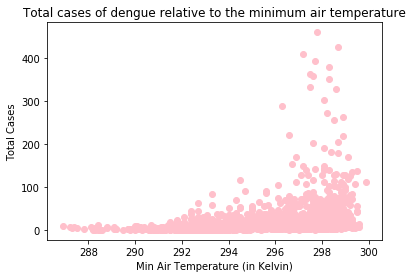

In [40]:
# Scatterplot of total cases vs min temp
plt.scatter(new_df.reanalysis_min_air_temp_k, new_df.total_cases, c="pink")
plt.xlabel("Min Air Temperature (in Kelvin)")
plt.ylabel("Total Cases")
plt.title("Total cases of dengue relative to the minimum air temperature")
plt.show()

## Dengue cases per year

In [41]:
# group by year
all_cases = new_df[['city','year', 'total_cases']]
cases_perYear = all_cases.groupby('year',as_index=False ).sum()
cases_per_cityYear = all_cases.groupby(['year', 'city'],as_index=False ).sum()

In [42]:
# Some cities don't have data for years. Fill the missing holes
# to make visualization easier.
sj_years_cases = cases_per_cityYear[cases_per_cityYear.city == 'sj']
iq_years_cases = cases_per_cityYear[cases_per_cityYear.city == 'iq']


sj_years = list(cases_per_cityYear[cases_per_cityYear.city == 'sj'].year)
iq_years = list(cases_per_cityYear[cases_per_cityYear.city == 'iq'].year)

# New cleaned up data frame with all years
years = []
new_sj_cases = []
new_iq_cases = []



for i in range(1990, 2010 + 1):
    years.append(i)
    
    if not (i in sj_years):
        new_sj_cases.append(0)
    else:
        new_sj_cases.append(sj_years_cases[sj_years_cases["year"] == i].total_cases.iloc[0])
        
    if not (i in iq_years):
        new_iq_cases.append(0)
    else:
        new_iq_cases.append(iq_years_cases[iq_years_cases["year"] == i].total_cases.iloc[0])


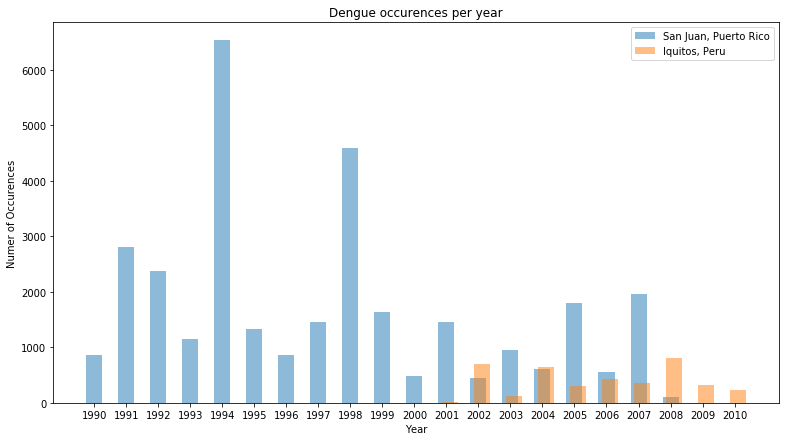

In [43]:
objects = years

y_pos = np.arange(len(objects))

 
plt.figure(num=None, figsize=(13, 7))


plt.bar(y_pos, new_sj_cases, align='center', alpha=0.5, width=0.5 )
plt.bar(y_pos + 0.1, new_iq_cases, align='center', alpha=0.5, width=0.5,)


plt.xticks(y_pos, objects)
plt.ylabel('Numer of Occurences')
plt.xlabel('Year')
plt.title('Dengue occurences per year')

plt.legend(["San Juan, Puerto Rico", "Iquitos, Peru"])
 
plt.show()
